In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/Mall_Customers.csv') as f:
    df = pd.read_csv(f)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Exploratory Data Analysis

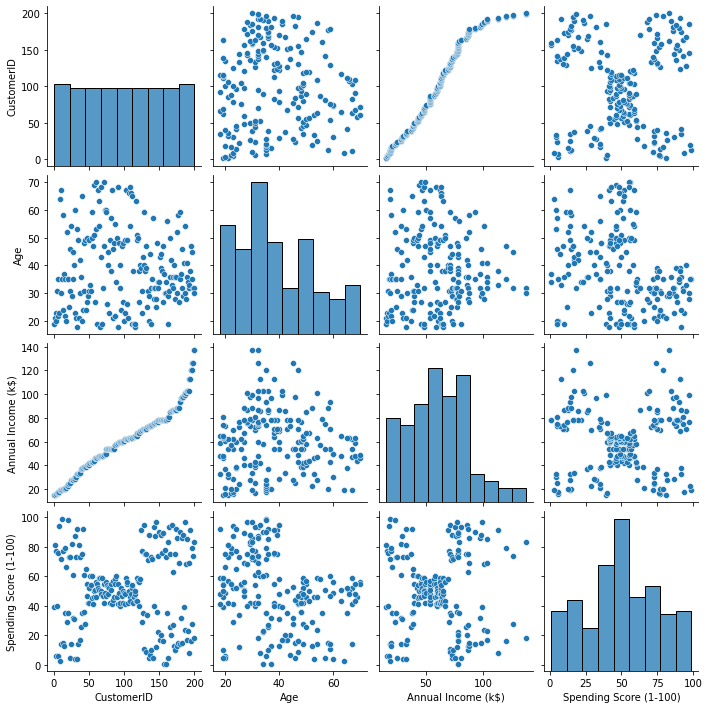

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

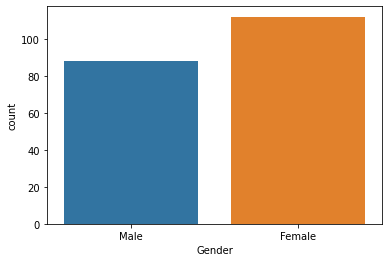

In [10]:
sns.countplot(x = 'Gender', data = df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

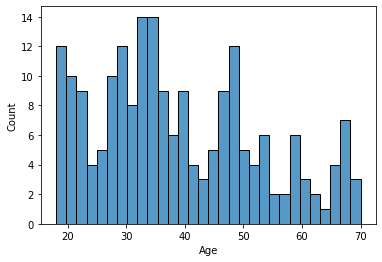

In [11]:
sns.histplot(df['Age'], bins = 30)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

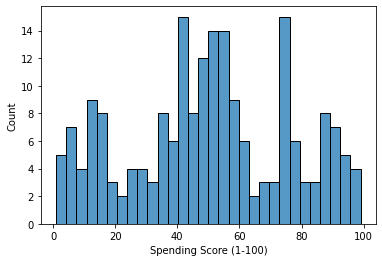

In [12]:
sns.histplot(df['Spending Score (1-100)'], bins = 30)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

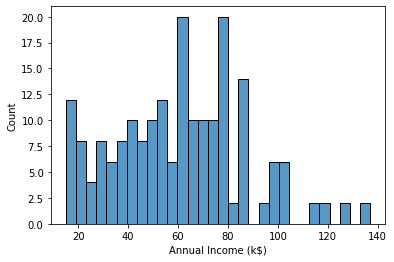

In [13]:
sns.histplot(df['Annual Income (k$)'], bins = 30)

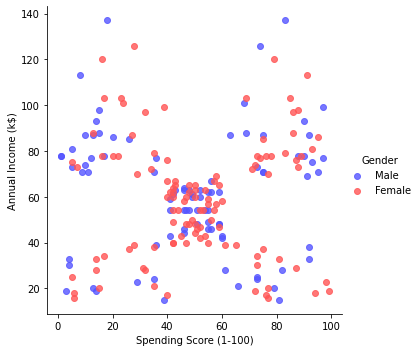

In [14]:
sns.lmplot(x = 'Spending Score (1-100)', y = 'Annual Income (k$)', fit_reg= False, palette= 'seismic', data = df, hue = 'Gender')

<AxesSubplot:xlabel='CustomerID', ylabel='Annual Income (k$)'>

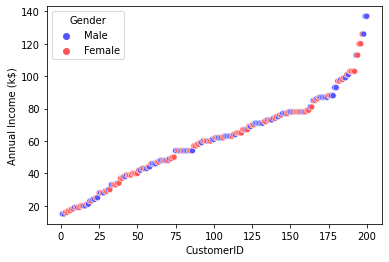

In [15]:
sns.scatterplot(x = 'CustomerID', y = 'Annual Income (k$)', palette= 'seismic', data = df, hue = 'Gender')

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

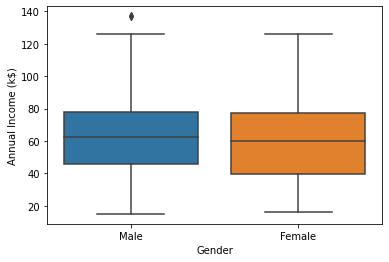

In [16]:
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)', data = df)

<AxesSubplot:>

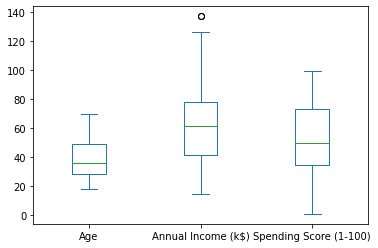

In [17]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot.box()

### Extracting two features for training and testing our data

In [18]:
dx = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [19]:
dx.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Plotting scatter plot for dx

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

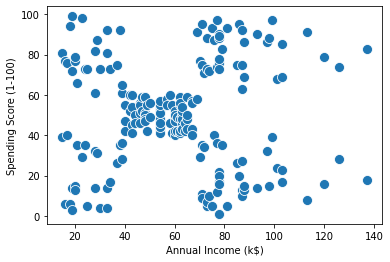

In [20]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', s = 100, data = dx)

In [21]:
 from sklearn.cluster import KMeans

In [22]:
error = []
for x in range(1, 21):
    km = KMeans(n_clusters= x)
    km.fit(dx)
    error.append(km.inertia_)

### Elbow Curve

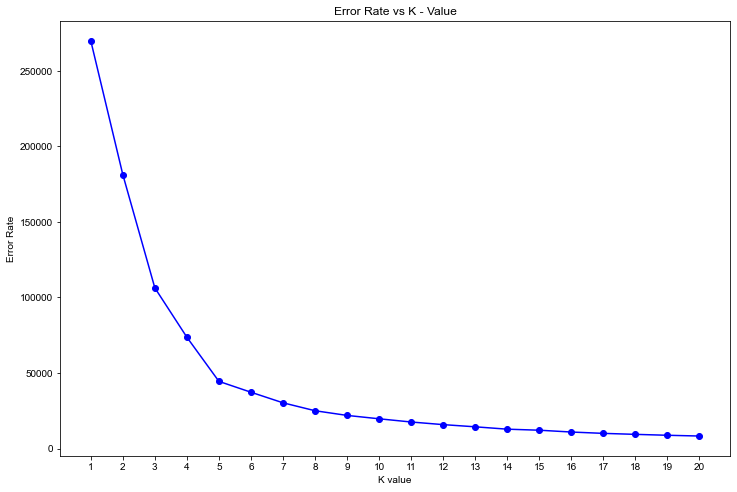

In [23]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 21), error, color = 'blue', marker = 'o')
plt.title('Error Rate vs K - Value')
plt.xlabel('K value')
plt.xticks(np.arange(1, 21, 1))
plt.ylabel('Error Rate')
sns.set_style('darkgrid')

In [24]:
km = KMeans(n_clusters= 5)

In [25]:
km.fit(dx)

KMeans(n_clusters=5)

In [26]:
pred = km.predict(dx)

In [27]:
df['label'] = pred

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


## Showing Clusters in scatterplot

Text(0, 0.5, 'Annual Income (k$)')

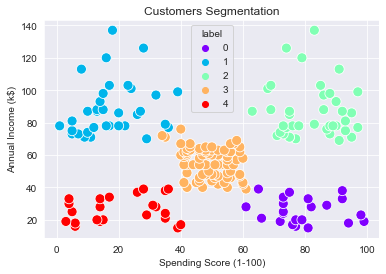

In [29]:
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'label', palette = 'rainbow', s = 100, data = df)
plt.title('Customers Segmentation')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

Text(0, 0.5, 'Age')

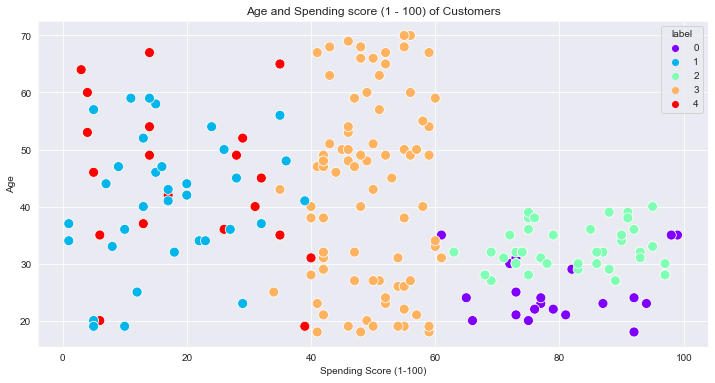

In [30]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Age', hue = 'label', palette = 'rainbow', s = 100, data = df)
plt.title('Age and Spending score (1 - 100) of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')

Text(0, 0.5, 'Annual Income (k$)')

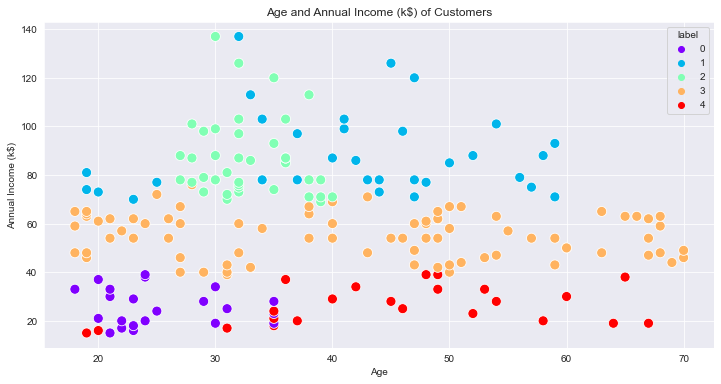

In [31]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', hue = 'label', palette = 'rainbow', s = 100, data = df)
plt.title('Age and Annual Income (k$) of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

### Print out the Customers ID

In [32]:
Customers = df[df['label'] == 0]
print('1st customers group = ', len(Customers))
print('CustomerID: ', Customers['CustomerID'].values)

1st customers group =  22
CustomerID:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


In [33]:
Customers_1 = df[df['label'] == 1]
print('2nd customers group = ', len(Customers_1))
print('CustomerID: ', Customers_1['CustomerID'].values)

2nd customers group =  35
CustomerID:  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


In [34]:
Customers_2 = df[df['label'] == 2]
print('3rd customers group = ', len(Customers_2))
print('CustomerID: ', Customers_2['CustomerID'].values)

3rd customers group =  39
CustomerID:  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


In [35]:
Customers_3 = df[df['label'] == 3]
print('4th customers group = ', len(Customers_3))
print('CustomerID: ', Customers_3['CustomerID'].values)

4th customers group =  81
CustomerID:  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]


In [36]:
Customers_4 = df[df['label'] == 4]
print('5th customers group = ', len(Customers_4))
print('CustomerID: ', Customers_4['CustomerID'].values)

5th customers group =  23
CustomerID:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


In [37]:
a = (len(Customers) + len(Customers_2)) / 200 * 100
b = (len(Customers_1) + len(Customers_3) + len(Customers_4)) / 200 * 100

In [38]:
a, b

(30.5, 69.5)

In [39]:
Outcome = pd.DataFrame({'Customers': ['High buying Customers', 'Low buying Customers'],
                       'Rating (%)': [30.5, 69.5]})

In [40]:
Outcome

,Customers,Rating (%)
0,High buying Customers,30.5
1,Low buying Customers,69.5


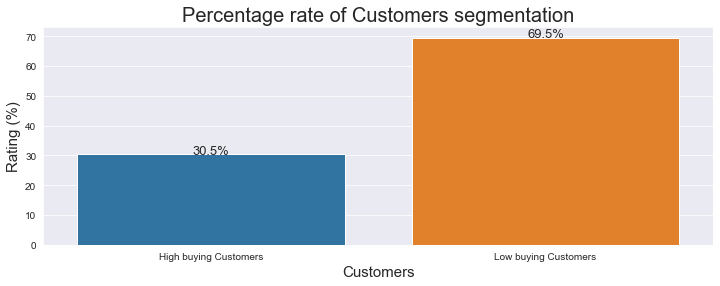

In [41]:
plt.figure(figsize = (12, 4))
ax = sns.barplot(x = 'Customers', y = 'Rating (%)', data = Outcome)
plt.title('Percentage rate of Customers segmentation', fontsize = 20)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Rating (%)', fontsize = 15)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + .05
    ax.annotate(percentage, (x, y), ha = 'center', size = 13)    